In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

'''For a brief overview of energy benchmarking, see the readMe.

    First, we load the datasets.'''



df=pd.read_csv("Chicago_Energy_Benchmarking_-_2014_Data_Reported_in_2015.csv")

gf=pd.read_csv("Chicago_Energy_Benchmarking_-_2015_Data_Reported_in_2016.csv")
hf=pd.read_csv("Chicago_Energy_Benchmarking_-_2016_Data_Reported_in_2017.csv")

print( df.dtypes, gf.dtypes, hf.dtypes)


Data Year                                       int64
ID                                              int64
Property Name                                  object
Address                                        object
ZIP Code                                       object
Community Area                                 object
Primary Property Type                          object
Gross Floor Area - Buildings (sq ft)            int64
Year Built                                      int64
# of Buildings                                  int64
ENERGY STAR Score                             float64
Electricity Use (kBtu)                          int64
Natural Gas Use (kBtu)                        float64
District Steam Use (kBtu)                     float64
District Chilled Water Use (kBtu)             float64
All Other Fuel Use (kBtu)                     float64
Site EUI (kBtu/sq ft)                           int64
Source EUI (kBtu/sq ft)                         int64
Weather Normalized Site EUI 

In [2]:
'''We see that most buildings did not report use of any other fuel source, so we drop consideration
 of buildings that do, then drop this column from consideration'''
df=df[df['All Other Fuel Use (kBtu)'].isnull()]
gf=gf[gf['All Other Fuel Use (kBtu)'].isnull()]
hf=hf[hf['All Other Fuel Use (kBtu)'].isnull()]
df=df.drop('All Other Fuel Use (kBtu)',axis=1)
gf=gf.drop('All Other Fuel Use (kBtu)',1)
hf=hf.drop('All Other Fuel Use (kBtu)',1)
#print(df['All Other Fuel Use (kBtu)'],gf['All Other Fuel Use (kBtu)'],gf['All Other Fuel Use (kBtu)'])


In [3]:
'''The idea behind the clean energy movement in developed countries is to continue to provide an adequate amount of energy while
    reducing greenhouse gas emissions. In the following analysis, we will consider Weather Normalized Site EUI (kBtu/sq ft) and
    GHG Intensity (kg CO2e/sq ft). If benchmarking is successful, we will expect to see a decrease in emissions as a function
    of energy usage.
    
    First, we filter our datasets so we will only consider properties where these two quantities are available'''
a='Weather Normalized Site EUI (kBtu/sq ft)'
b='GHG Intensity (kg CO2e/sq ft)'

df=df[~df['Weather Normalized Site EUI (kBtu/sq ft)'].isnull()&~df['GHG Intensity (kg CO2e/sq ft)'].isnull()]
gf=gf[~gf['Weather Normalized Site EUI (kBtu/sq ft)'].isnull()&~gf['GHG Intensity (kg CO2e/sq ft)'].isnull()]
hf=hf[~hf['Weather Normalized Site EUI (kBtu/sq ft)'].isnull()&~hf['GHG Intensity (kg CO2e/sq ft)'].isnull()]


In [4]:
'''We want to evaluate the effectiveness of the program, so we will look at buildings that have participated in the program for
    all three years (i.e. that appear in all three datasets) and look for changes in energy usage. We will compare this with the
    energy usage of buildings that joined in the second year (i.e. that do not appear in the first dataset) 
    and of buildings that have joined the program most recently (i.e. that appear in the 2017 dataset and no other)'''

'We want to evaluate the effectiveness of the program, so we will look at buildings that have participated in the program for\n    all three years (i.e. that appear in all three datasets) and look for changes in energy usage. We will compare this with the\n    energy usage of buildings that joined in the second year (i.e. that do not appear in the first dataset) \n    and of buildings that have joined the program most recently (i.e. that appear in the 2017 dataset and no other)'

In [5]:
'''The following script creates dataframes dff, gff, and hff. These are data from 2015, 2016, and 2017 for properties appearing
    in all three datasets'''
prop=df['ID'].astype(str).values.tolist()
gff=gf.loc[gf['ID'].isin(prop)]#2016 props that appeared in 2015 data
prop1=gff['ID'].astype(str).values.tolist()

hff=hf.loc[hf['ID'].isin(prop1)]#2017 props that appeared in 2015 and 2016 data
#print( df.count(), gff.count(), hff.count())

prop2=hff['ID'].astype(str).values.tolist()
gff=gff.loc[gff['ID'].isin(prop2)]#2016 props that appeared in all three datasets
dff=df.loc[df['ID'].isin(prop2)]#2015 props that appeared in all three datasets
#As a sanity check, make sure we have the same number of entries in each dataset
print( dff.count(), gff.count(), hff.count())

Data Year                                     201
ID                                            201
Property Name                                 201
Address                                       201
ZIP Code                                      201
Community Area                                201
Primary Property Type                         201
Gross Floor Area - Buildings (sq ft)          201
Year Built                                    201
# of Buildings                                201
ENERGY STAR Score                             166
Electricity Use (kBtu)                        201
Natural Gas Use (kBtu)                        143
District Steam Use (kBtu)                      12
District Chilled Water Use (kBtu)              20
Site EUI (kBtu/sq ft)                         201
Source EUI (kBtu/sq ft)                       201
Weather Normalized Site EUI (kBtu/sq ft)      201
Weather Normalized Source EUI (kBtu/sq ft)    201
Total GHG Emissions (Metric Tons CO2e)        201


In [6]:
'''We get dataframes gff2 and hff2 for properties appearing the 2016 and 2017 datasets
    but not the first'''
gff2=gf.loc[~gf['ID'].isin(prop)]#2016 data for properties not in 2015 data
prop3=gff2['ID'].astype(str).values.tolist()

hff2=hf.loc[hf['ID'].isin(prop3)]#2017 data for properties in 2016 data but not in 2015 data
prop4=hff2['ID'].astype(str).values.tolist()
gff2=gff2.loc[gff2['ID'].isin(prop4)]#2016 data for properties in 2017 data but not in 2015 data
#print(gff2.count(),hff2.count())



In [7]:

'''Now, get a dataframe for 2017 properties that do not appear in previous datasets'''
prop5=gf['ID'].astype(str).values.tolist()
hf2=hf.loc[~hf['ID'].isin(prop)]
hf2=hf2.loc[~hf2['ID'].isin(prop5)]


In [8]:
#We compare the distribution of data for properties in their first year participating in the program


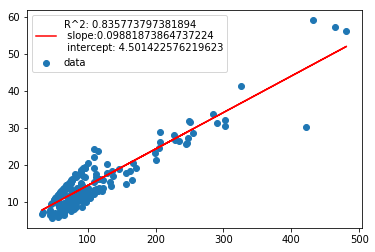

       Weather Normalized Site EUI (kBtu/sq ft)  GHG Intensity (kg CO2e/sq ft)
count                                201.000000                     201.000000
mean                                 106.960199                      15.071095
std                                   73.912776                       7.989405
min                                   33.000000                       5.630000
25%                                   67.000000                      10.470000
50%                                   84.000000                      13.230000
75%                                  110.000000                      16.690000
max                                  481.000000                      59.110000


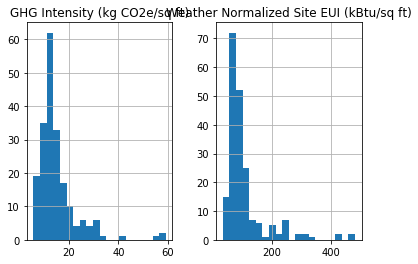

In [9]:
'''We compare energy usage intensity and GHG emission intensity for properties that have participated in the program for all three 
    years. We first visualize the data.'''
base1x=dff['Weather Normalized Site EUI (kBtu/sq ft)'].values
base1y=dff['GHG Intensity (kg CO2e/sq ft)'].values
scat1=plt.scatter(base1x,base1y, label='data')
slope, intercept, r_value, p_value, std_err = stats.linregress(base1x,base1y)
r2=r_value**2
line1=plt.plot(base1x,slope*base1x+intercept, color='r', label='R^2: '+str(r2)+'\n slope:'+str(slope)+'\n intercept: '+str(intercept) )
plt.legend()
plt.show()
hist1=dff[[a,b]].hist(bins=20)
'''We also give a data summary'''
print(dff[[a,b]].describe())

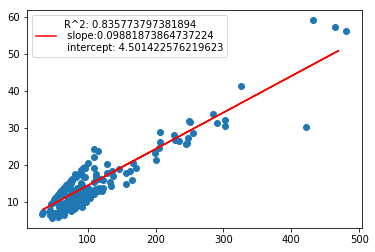

       Weather Normalized Site EUI (kBtu/sq ft)  GHG Intensity (kg CO2e/sq ft)
count                                201.000000                     201.000000
mean                                 103.037313                      13.037811
std                                   69.728499                       7.407257
min                                   34.300000                       4.400000
25%                                   65.200000                       9.100000
50%                                   81.100000                      11.000000
75%                                  104.000000                      13.800000
max                                  469.300000                      54.100000


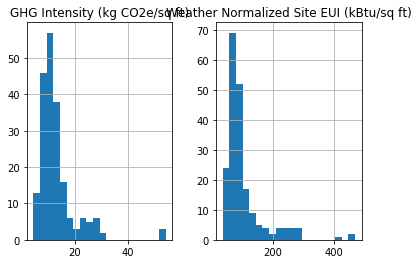

In [10]:
base2x=hff['Weather Normalized Site EUI (kBtu/sq ft)'].values
base2y=hff['GHG Intensity (kg CO2e/sq ft)'].values
scat1=plt.scatter(base1x,base1y)
slope, intercept, r_value, p_value, std_err = stats.linregress(base1x,base1y)
r2=r_value**2
line1=plt.plot(base2x,slope*base2x+intercept, color='r', label='R^2: '+str(r2)+'\n slope:'+str(slope)+'\n intercept: '+str(intercept) )
plt.legend()

plt.show()
hist1=hff[[a,b]].hist(bins=20)
print(hff[[a,b]].describe())

In [11]:
''' As a formal test to see if there is a significant difference in emissions or energy usage, we use the 
Wilcoxson signed rank test for non-parametric data.'''
st,pval=stats.wilcoxon(base1x,base2x)
st2,pval2=stats.wilcoxon(base1y,base2y)
print(pval,pval2)

0.5095420021783733 0.0004736512489672381


In [12]:
'''As is standard practice, we deem that there is a significant difference between the data if p<0.05. 
The test thus indicates that while there is no change in energy usage, there is a significant reduction in greenhouse gas
emissions.'''

'As is standard practice, we deem that there is a significant difference between the data if p<0.05. \nThe test thus indicates that while there is no change in energy usage, there is a significant reduction in greenhouse gas\nemissions.'

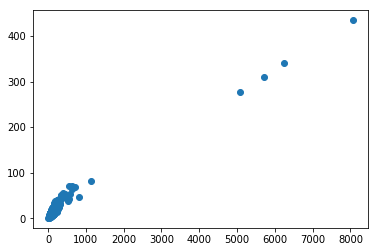

In [13]:
'''Now we look at properties first appearing in the 2016 dataset'''
base1x=gff2['Weather Normalized Site EUI (kBtu/sq ft)'].values
base1y=gff2['GHG Intensity (kg CO2e/sq ft)'].values
scat1=plt.scatter(base1x,base1y)
plt.show()

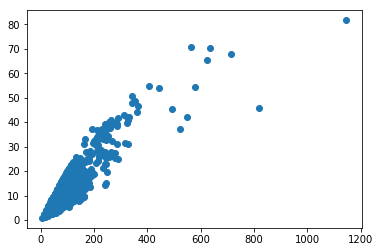

       Weather Normalized Site EUI (kBtu/sq ft)  GHG Intensity (kg CO2e/sq ft)
count                               1192.000000                    1192.000000
mean                                 103.867869                      12.041611
std                                   75.922220                       8.640258
min                                    5.200000                       0.900000
25%                                   68.800000                       7.300000
50%                                   87.000000                       9.500000
75%                                  111.975000                      13.500000
max                                 1146.300000                      81.600000


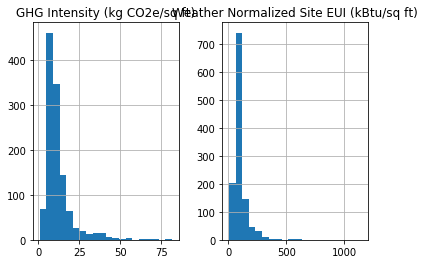

In [14]:
'''We see that in gff2, the data is skewed by four outliers, so we remove these points so as to get a clearer assessment of 
    the rest of the data'''
#print(gff2.count(),hff2.count())
gff2=gff2.drop(gff2[a].idxmax())#drop row where site EUI is max
gff2=gff2.drop(gff2[a].idxmax())#drop row where site EUI is max
gff2=gff2.drop(gff2[a].idxmax())#drop row where site EUI is max
gff2=gff2.drop(gff2[a].idxmax())#drop row where site EUI is max
prop6=gff2['ID'].astype(str).values.tolist()
hff2=hff2.loc[hff2['ID'].isin(prop6)]#Drop for corresponding 2017 data
#print(gff2.count(),hff2.count())

base3x=gff2[a].values
base3y=gff2[b].values
scat1=plt.scatter(base3x,base3y)
plt.show()
hist1=gff2[[a,b]].hist(bins=20)
'''We also give a data summary'''
print(gff2[[a,b]].describe())

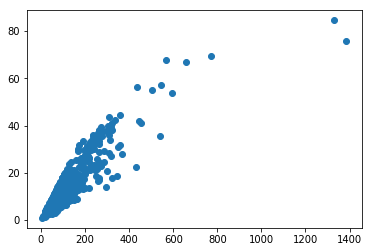

       Weather Normalized Site EUI (kBtu/sq ft)  GHG Intensity (kg CO2e/sq ft)
count                               1192.000000                    1192.000000
mean                                 107.259564                      11.509396
std                                   86.228132                       8.421212
min                                    4.900000                       0.900000
25%                                   70.400000                       6.900000
50%                                   88.000000                       9.100000
75%                                  113.100000                      13.000000
max                                 1385.800000                      84.600000


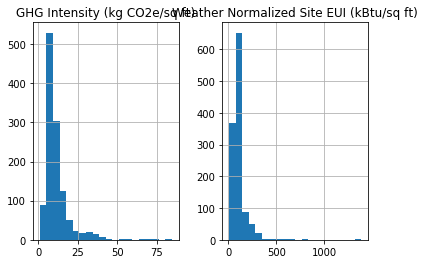

In [15]:

base4x=hff2['Weather Normalized Site EUI (kBtu/sq ft)'].values
base4y=hff2['GHG Intensity (kg CO2e/sq ft)'].values
scat1=plt.scatter(base4x,base4y)
plt.show()
hist1=hff2[[a,b]].hist(bins=20)
'''We also give a data summary'''
print(hff2[[a,b]].describe())

In [16]:
''' As a formal test to see if there is a significant difference in emissions or energy usage, we use the 
Wilcoxson signed rank test for non-parametric data.'''
st,pval=stats.wilcoxon(base3x,base4x)
st2,pval2=stats.wilcoxon(base3y,base4y)
print(pval,pval2)

0.22653992989011884 0.05167435461124446


In [17]:
'''We see that there is no significant change in either energy usage or GHG emissions'''

'We see that there is no significant change in either energy usage or GHG emissions'

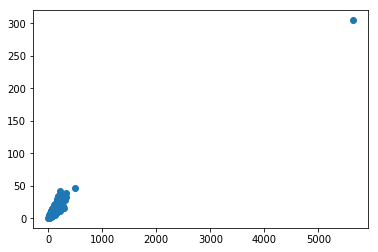

In [18]:
'''Now we look at properties most recently joining the program'''
base1x=hf2['Weather Normalized Site EUI (kBtu/sq ft)'].values
base1y=hf2['GHG Intensity (kg CO2e/sq ft)'].values
scat1=plt.scatter(base1x,base1y)
plt.show()

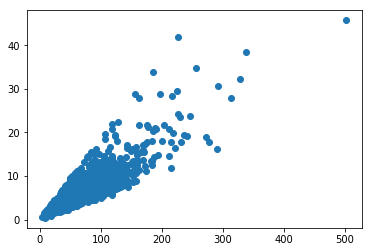

       Weather Normalized Site EUI (kBtu/sq ft)  GHG Intensity (kg CO2e/sq ft)
count                               1229.000000                    1229.000000
mean                                  85.923922                       7.999593
std                                   41.729808                       4.271349
min                                    3.600000                       0.400000
25%                                   60.600000                       5.700000
50%                                   81.500000                       7.300000
75%                                  102.500000                       9.200000
max                                  502.600000                      45.700000


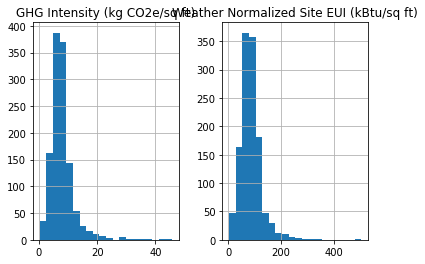

In [19]:
'''We see that in hf2, the data is skewed by a single outlier, so we remove this point so as to get a clearer assessment of 
    the rest of the data'''
hf2=hf2.drop(hf2[a].idxmax())#drop row where site EUI is max
base5x=hf2['Weather Normalized Site EUI (kBtu/sq ft)'].values
base5y=hf2['GHG Intensity (kg CO2e/sq ft)'].values
scat1=plt.scatter(base5x,base5y)
plt.show()
print(hf2[[a,b]].describe())
hist1=hf2[[a,b]].hist(bins=20)

In [20]:
'''Now we assess whether, after three years, there is a significant difference between properties joining the program in the
    first, second, and third years (hff, hff2, and hf2, respectively). For this we use the Wilcoxon rank sums test.
    
    First, let's do hff and hf2 '''
st3,pval3=stats.ranksums(base2x,base5x)
st4,pval4=stats.ranksums(base2y,base5y)
print(pval3,pval4)

0.08874417388404511 9.57840849031599e-44


In [21]:
'''Now, hff and hff2'''
st3,pval3=stats.ranksums(base2x,base4x)
st4,pval4=stats.ranksums(base2y,base4y)
print(pval3,pval4)


0.02491893096032323 6.255021174406948e-09


In [22]:
'''Now, hff2 and hf2'''
st3,pval3=stats.ranksums(base4x,base5x)
st4,pval4=stats.ranksums(base4y,base5y)
print(pval3,pval4)

2.606589374782669e-12 3.361951024270702e-45


In [23]:
'''It is notable that when we compare hff and hf2, we observe the same energy usage but significantly less emissions in hf2.
    So although the properties in hff may have benefited from participating in the program, somehow hf2 is better off without
    any help. However, it is good that hf2 joined the program, because hff and hff2 can learn from them and hopefully improve
    their performances.

    For some reason, hff2 has significantly higher energy usage than both hff and hf2, higher emissions than hf2, but still less emissions than hff. This
    perhaps signifies that they use cleaner energy sources than hff, but less efficiently.'''

'It should be noted, however, that the properties most recently joining the program also had the same energy usage, \n    but significantly less emissions than the previous sample even after participating in the program for three years. So, did\n    energy benchmarking actually do anything? It could possibly have been responsible for the reduction in greenhouse gas \n    emissions in the first sample of properties. But the question remains why the most recent sample of buildings\n    had fewer emiss'